In [41]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
# ✅ Step 1: Load Dataset
data = pd.read_csv(r'C:\Users\murar\OneDrive\ドキュメント\Custom Office Templates\fake-real.csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
237,658,"Clinton has delegates to win Dem nomination, A...",Hillary Clinton has earned enough delegates to...,NaN
238,10357,Hillary IMPLODES: Trump 'Took Everything...Pai...,Hillary Clinton can’t believe she’s losing.,NaN
239,4865,"Trump says Obama born in US, ‘period’ – after ...",Donald Trump tried to tamp down a newly revive...,NaN
240,4031,"MH370: If debris is part of missing plane, wha...",(CNN) If confirmed to be from missing Malaysia...,NaN


In [105]:
df=df.dropna()
df

,Unnamed: 0,title,text,label,Classifier
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the lesson fro...,FAKE,0
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL,1
...,...,...,...,...,...
201,8142,We Live In A Time Where Each Individual Has Im...,by vin armani you know the state is in trouble...,FAKE,0
202,4714,"Trump slams 'corrupt' media, as more women mak...",two more women accused republican nominee dona...,REAL,1
203,6176,Only Demented Imbeciles Want A Killary Reign O...,in government corruption special interests us ...,FAKE,0
204,9402,This anti-Trump advert on the side of a bus is...,next swipe leftright this antitrump advert on ...,FAKE,0


In [109]:
df['text'] = df['text'].fillna('')  # Replace NaN in 'text' column with empty string
df

,Unnamed: 0,title,text,label,Classifier
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the lesson fro...,FAKE,0
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL,1
...,...,...,...,...,...
201,8142,We Live In A Time Where Each Individual Has Im...,by vin armani you know the state is in trouble...,FAKE,0
202,4714,"Trump slams 'corrupt' media, as more women mak...",two more women accused republican nominee dona...,REAL,1
203,6176,Only Demented Imbeciles Want A Killary Reign O...,in government corruption special interests us ...,FAKE,0
204,9402,This anti-Trump advert on the side of a bus is...,next swipe leftright this antitrump advert on ...,FAKE,0


In [111]:
df.dropna().sum()

Unnamed: 0                                              1056578
title         You Can Smell Hillary’s FearWatch The Exact Mo...
text          daniel greenfield a shillman journalism fellow...
label         FAKEFAKEREALFAKEREALFAKEFAKEREALREALREALREALRE...
Classifier                                                  106
dtype: object

In [113]:
# ✅ Step 2: Data Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [115]:
df['text'] = df['text'].apply(clean_text)

In [117]:
# ✅ Step 3: Encode Labels ("Fake" -> 0, "Real" -> 1)
le = LabelEncoder()
df['Classifier'] = le.fit_transform(df['label'])


In [119]:
# ✅ Step 4: TF-IDF Vectorization (Convert text to numerical format)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1,2))  # Using bi-grams for better context
X = vectorizer.fit_transform(df['text'])
y = df['Classifier'].values

In [120]:
# ✅ Step 5: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# ✅ Step 6: Train SVM Model
model = SVC(kernel='linear', probability=True)  # Linear kernel works best for text classification
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [124]:

# ✅ Step 7: Model Predictions
y_pred = model.predict(X_test)

In [125]:
#  ✅ Step 8: Evaluate Model Performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"\n🔹 Model Accuracy: {accuracy:.2f}")


🔹 Model Accuracy: 0.90


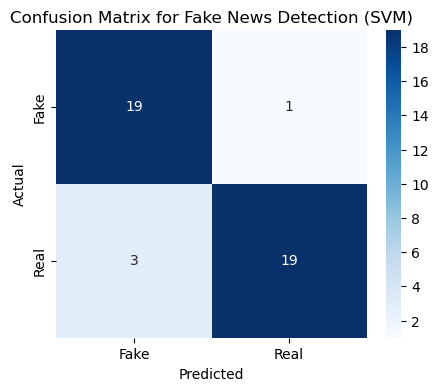

In [127]:
# ✅ Step 9: Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Fake News Detection (SVM)")
plt.show()

In [131]:
# ✅ Step 10: Classification Report
report = classification_report(Y_test, y_pred, target_names=["Fake News", "Real News"])
print("\n🔹 Classification Report:\n")
print(report)


🔹 Classification Report:

              precision    recall  f1-score   support

   Fake News       0.86      0.95      0.90        20
   Real News       0.95      0.86      0.90        22

    accuracy                           0.90        42
   macro avg       0.91      0.91      0.90        42
weighted avg       0.91      0.90      0.90        42



In [145]:
# ✅ Step 11: Predict New News
def predict_news(news_text):
    news_text_clean = clean_text(news_text)  # Clean the input text
    news_vector = vectorizer.transform([news_text_clean])  # Convert to TF-IDF format
    prediction = model.predict(news_vector)
    return "Real News" if prediction[0] == 1 else "Fake News"

In [155]:
# Example Test
test_news = " The death of Saudi Arabias King Abdullah early Friday has launched an uncertain new era for U.S. officials to negotiate amid the spreading influence of Iran and the ongoing battle to roll back gains made by the Islamic State terror group in Iraq and Syria. A former U.S. diplomat close to the Saudi royal family told Fox News Thursday that the death of the 90-year-old King, along with this weeks collapse of the U.S.-supported government in Yemen, was a "worst-case scenario" because it removed another obstacle to Iran expanding its reach in the region. The former diplomat said that Tehrans influence could now be seen in four Middle Eastern capitals -- Sanaa in Yemen, as well as Baghdad, Damascus, and to a lesser extent, Beirut.

Abdullah, a Sunni Arab, made one of the main priorities of his rule countering mainly Shiite Iran whenever it tried to make advances in the region. He also backed Sunni factions against Tehrans allies in several countries, but in Lebanon, for example, the policy failed to stop Iranian-backed Hezbollah from gaining the upper hand. And Tehran and Riyadhs colliding ambitions stoked proxy conflicts around the region that enflamed Sunni-Shiite hatreds — most notably and terribly in Syrias civil war, where the two countries backed opposing sides. Those conflicts in turn hiked Sunni militancy that returned to threaten Saudi Arabia.

With the death of Abdullah, decision-making in Riyadh is likely to be more cautious on issues like Iran and Syria, former U.S. diplomat Dennis Ross told the Wall Street Journal.

Citing Saudi officials, the paper reports that King Abdullah became less fond of the U.S. in the final years of his reign. The king repeatedly pushed Obama to lend stronger backing to the rebels against Syrian President Bashar al-Assad, against whom he bore a personal animus, and was reportedly furious when airstrikes threatened against Damascus by Obama in the summer of 2013 did not come to pass.

The officials also said that the late king took a dim view of ongoing talks between the U.S. and Iran over the latter nations nascent nuclear program, seeing it as a sign that Washington was more than willing to work behind its allys back.

King Abdullahs death may also open up a bigger power vacuum in Riyadh than first believed. His successor, 79-year-old half-brother Prince Salman, had recently taken on some of the ailing Abdullahs responsibilities. However, the Journal reports that U.S. officials do not consider him to be a strong or healthy ruler in his own right, which raises the possibility that others in the royal family could come to the forefront.

The Journal reports that one of the first and biggest questions to face the Saudi king is what to do about the ongoing unrest in Yemen, where gains by Shiite Houthi rebels forced the resignation of the countrys president and entire government Thursday.

There is also the question of what to do about the ongoing U.S.-led bombing campaign against the Islamic State, better known as ISIS. The late King Abdullah was so fearful of the groups growing power that he committed Saudi airpower to strike the Sunni insurgency.

Among the other decisions facing Salman is whether he will continue the countrys ongoing strategy of increased levels of oil production. The country produced 9.6 million barrels a day in January, according to Platts, the energy information division of McGraw Hill. Thats enough to satisfy 11 percent of global demand, despite a global price drop of nearly 60 percent since June.

The price of U.S. crude was up 88 cents, or 1.9 percent, to $47.19 a barrel in after-hours trading Thursday.

Fox News Catherine Herridge and The Associated Press contributed to this report.

Click for more from The Wall Street Journal. "

print("\n📰 Predicted Label for News: ", predict_news(test_news))

SyntaxError: unterminated string literal (detected at line 2) (4281962215.py, line 2)

In [157]:
print("\n📰 Predicted Label for News: ", predict_news(test_news))


📰 Predicted Label for News:  Real News
